### Hydrography Plot: Observed Streamflow vs Trained Simulated Streamflow 

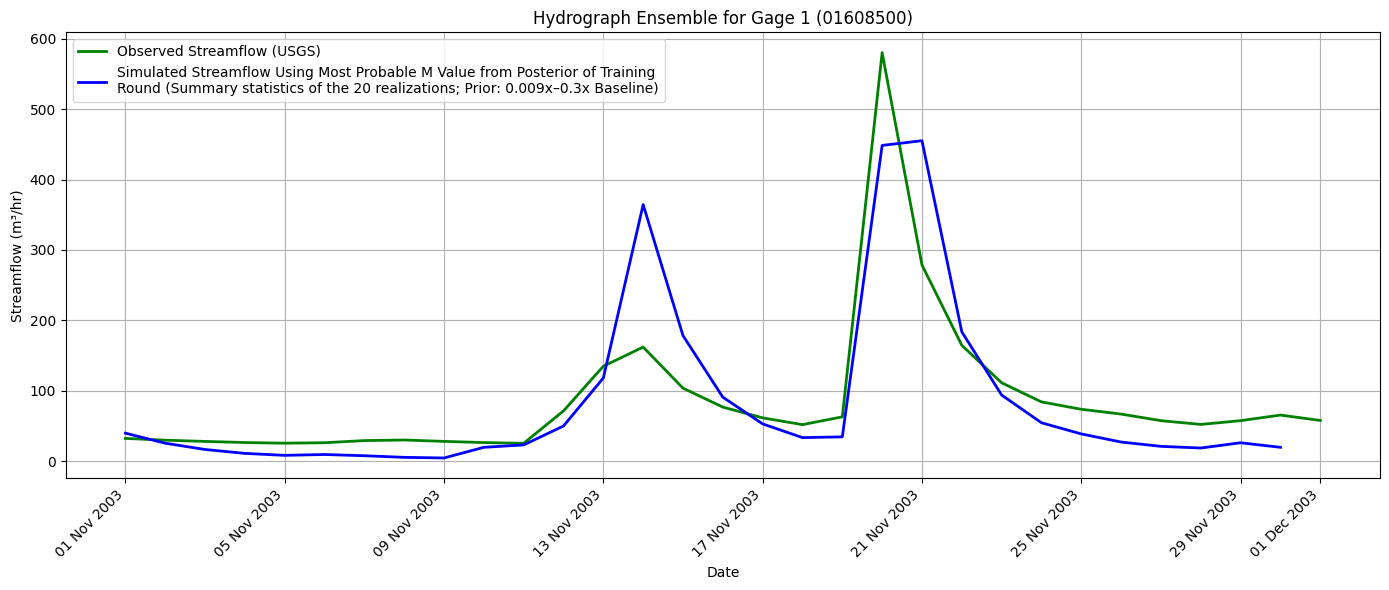

In [2]:
# ----------------------------------------------------
# Import Libraries 
# ----------------------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ----------------------------------------------------
# Set Station ID
# ----------------------------------------------------

station_id = "01608500"

# ----------------------------------------------------
# Initialize Streamflow Ensemble List
# ----------------------------------------------------
streamflow_ensemble = []
dates = None


# ----------------------------------------------------
# Load Observed and Baseline Data
# ----------------------------------------------------
df_obs = pd.read_csv("/home/ms6730/SBI_calibration/training_with_20_realizations/SNPE/training_with_20_realizations_only/excel_file_simulated_streamflow/streamflow_daily_USGS.csv")
df_twenty_sim_sum_statistics = pd.read_csv("/home/ms6730/SBI_calibration/training_with_20_realizations/SNPE/training_with_20_realizations_summary_statistics_only/streamflow_excel/streamflow__trained_20_summary_statistics_only.csv")

# ----------------------------------------------------
# Convert and Align Date Columns and Drop First 5 Days
# ----------------------------------------------------
dates_obs = pd.to_datetime(df_obs["date"])[5:]
df_obs = df_obs.iloc[5:].reset_index(drop=True)

df_twenty_sim_sum_statistics["date"] = pd.to_datetime(df_twenty_sim_sum_statistics["date"])
df_twenty_sim_sum_statistics.set_index("date", inplace=True)
df_twenty_sim_sum_statistics = df_twenty_sim_sum_statistics.iloc[5:]
dates_twenty_sim_stat = df_twenty_sim_sum_statistics.index

# ----------------------------------------------------
# Plot All Data
# ----------------------------------------------------
plt.figure(figsize=(14, 6))


# Plot observed streamflow
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, label='Observed Streamflow (USGS)', zorder=10)


# Plot best-matching simulated streamflow
plt.plot(dates_twenty_sim_stat, df_twenty_sim_sum_statistics[station_id], color='blue', linewidth=2,
         label='Simulated Streamflow Using Most Probable M Value from Posterior of Training \nRound (Summary statistics of the 20 realizations; Prior: 0.009x–0.3x Baseline)', zorder=10)

# Titles and labels
plt.title(f"Hydrograph Ensemble for Gage 1 ({station_id})")
plt.xlabel("Date")
plt.ylabel("Streamflow (m³/hr)")
plt.legend(loc="upper left")
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# ----------------------------------------------------
# Save the Figure
# ----------------------------------------------------
output_path = "/home/ms6730/SBI_calibration/training_with_20_realizations/SNPE/training_with_20_realizations_summary_statistics_only/Hydrograph_plots/hydrograph_01608500"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# ----------------------------------------------------
# Show Plot
# ----------------------------------------------------
plt.show()
